<a href="https://colab.research.google.com/github/ElisaVianey13/DSC/blob/main/ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving SUPERMARKET.xlsx to SUPERMARKET.xlsx


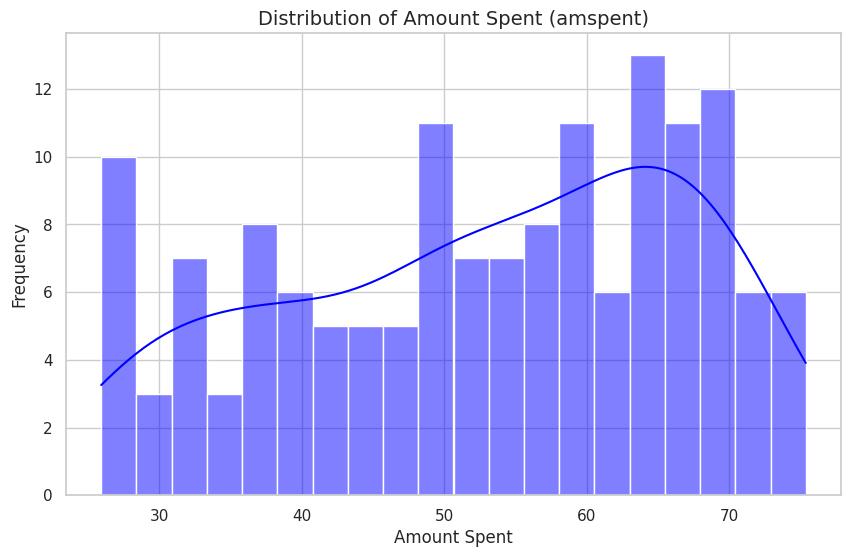

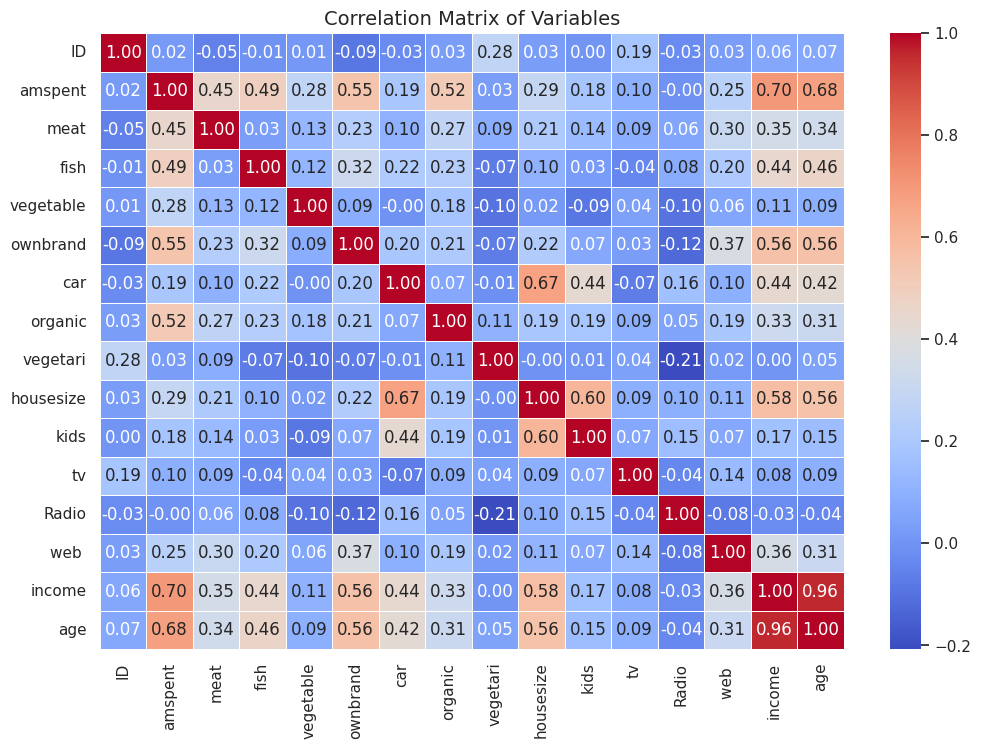

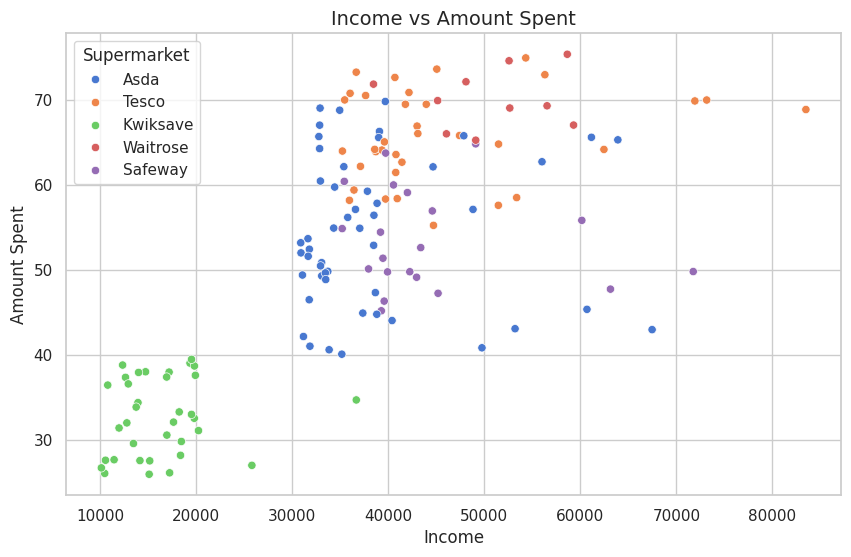

<ipython-input-6-cc0ce0ab3158>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Supermarket', y='amspent', data=data, palette='Set2')


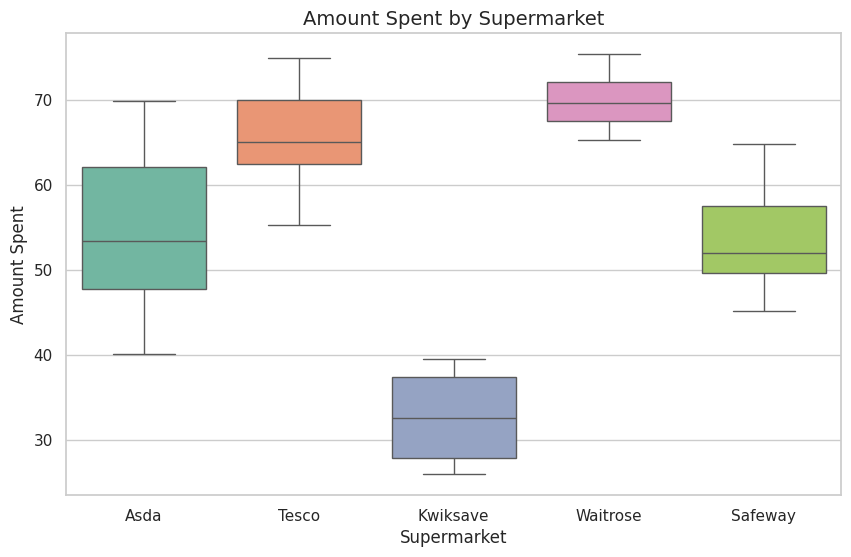

<ipython-input-6-cc0ce0ab3158>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spending_data.index, y=spending_data.values, palette='viridis')


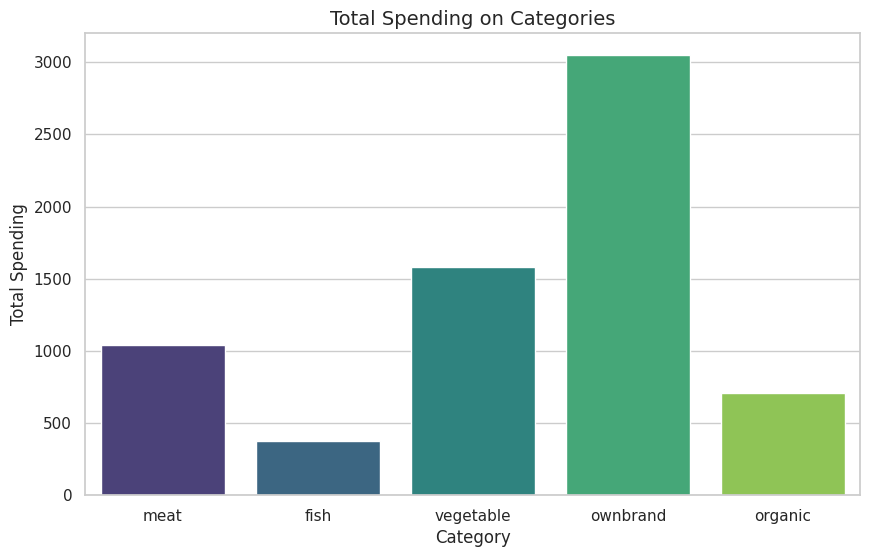

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # import pandas
import io
import numpy as np

# Access the uploaded file from the 'uploaded' dictionary using its actual name
data = pd.read_excel(io.BytesIO(uploaded['SUPERMARKET.xlsx'])) # Read the uploaded file into a DataFrame

# Set plot style
sns.set(style="whitegrid")

# Visualize the distribution of 'amspent' (amount spent)
plt.figure(figsize=(10, 6))
sns.histplot(data['amspent'], bins=20, kde=True, color='blue')
plt.title('Distribution of Amount Spent (amspent)', fontsize=14)
plt.xlabel('Amount Spent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize correlation matrix to understand relationships
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
corr = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables', fontsize=14)
plt.show()

# Visualize the relationship between income and amount spent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='amspent', data=data, hue='Supermarket', palette='muted')
plt.title('Income vs Amount Spent', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.show()

# Visualize the distribution of age and amount spent
plt.figure(figsize=(10, 6))
sns.boxplot(x='Supermarket', y='amspent', data=data, palette='Set2')
plt.title('Amount Spent by Supermarket', fontsize=14)
plt.xlabel('Supermarket', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.show()

# Visualize spending on categories by supermarket
spending_columns = ['meat', 'fish', 'vegetable', 'ownbrand', 'organic']
spending_data = data[spending_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=spending_data.index, y=spending_data.values, palette='viridis')
plt.title('Total Spending on Categories', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.show()

<ipython-input-11-42cfb0b685c9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kids', y='amspent', data=data, palette='Set2')


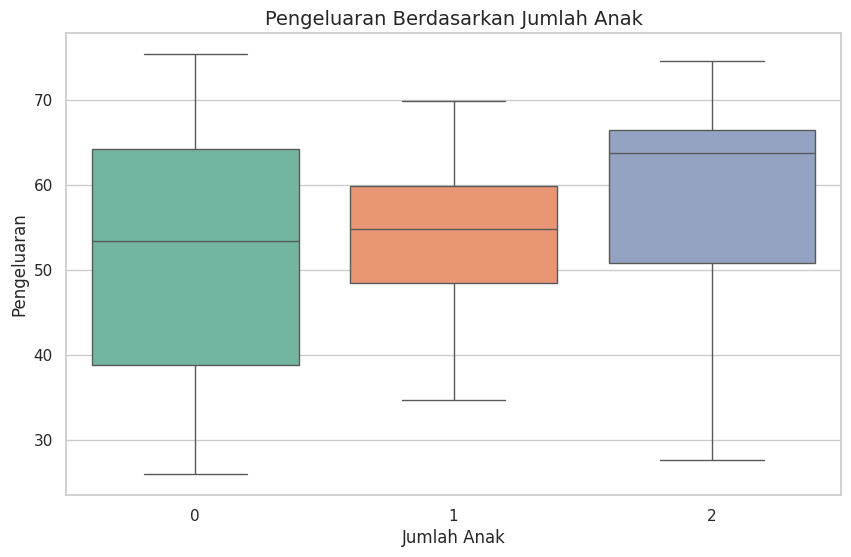

<ipython-input-11-42cfb0b685c9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='housesize', y='amspent', data=data, palette='Set2')


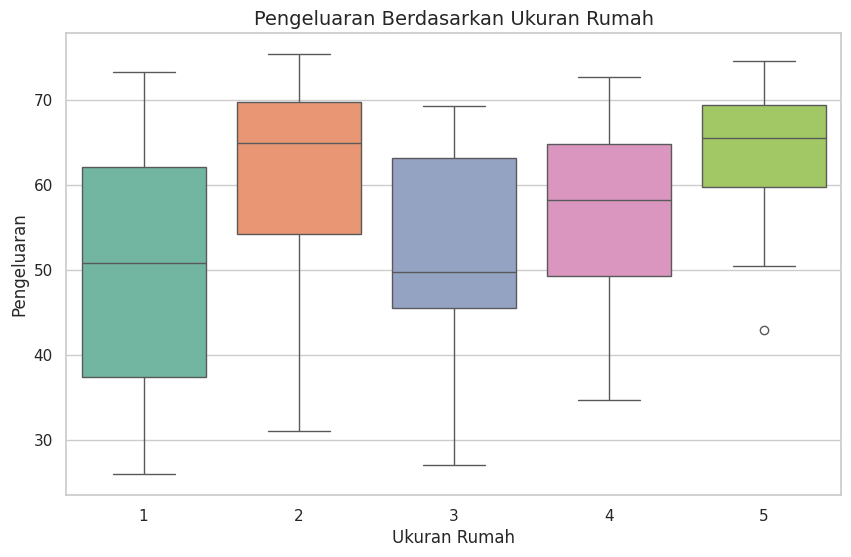

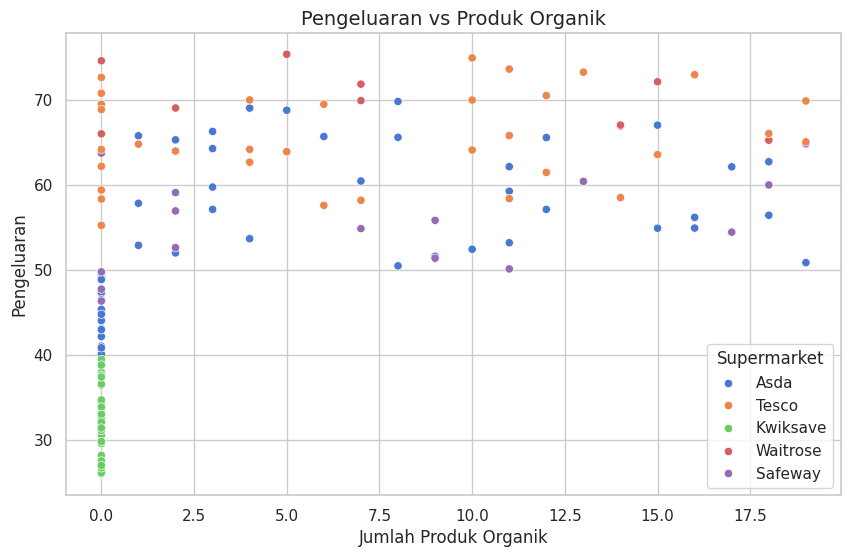

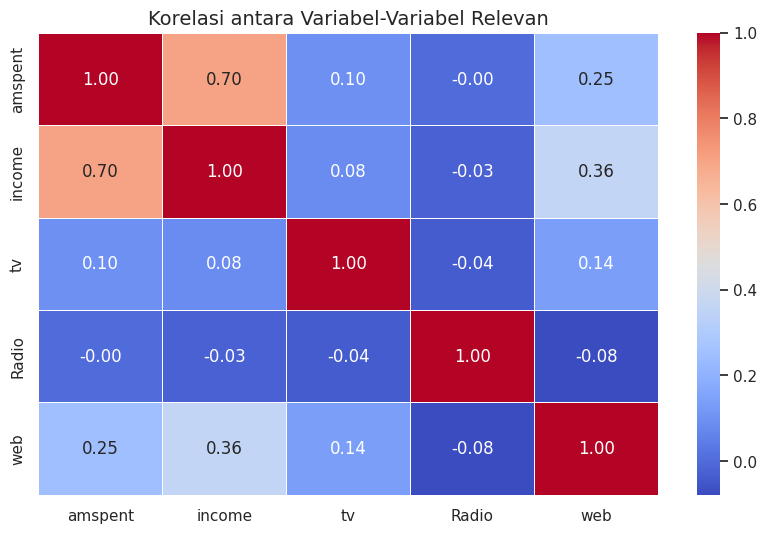

In [11]:
# Analisis lebih lanjut:
# 1. Pengeluaran berdasarkan jumlah anak
# 2. Pengeluaran berdasarkan ukuran rumah
# 3. Pengeluaran berdasarkan jumlah produk organik yang dibeli
# 4. Korelasi antara variabel-variabel lain yang relevan

# Pengeluaran berdasarkan jumlah anak
plt.figure(figsize=(10, 6))
sns.boxplot(x='kids', y='amspent', data=data, palette='Set2')
plt.title('Pengeluaran Berdasarkan Jumlah Anak', fontsize=14)
plt.xlabel('Jumlah Anak', fontsize=12)
plt.ylabel('Pengeluaran', fontsize=12)
plt.show()

# Pengeluaran berdasarkan ukuran rumah
plt.figure(figsize=(10, 6))
sns.boxplot(x='housesize', y='amspent', data=data, palette='Set2')
plt.title('Pengeluaran Berdasarkan Ukuran Rumah', fontsize=14)
plt.xlabel('Ukuran Rumah', fontsize=12)
plt.ylabel('Pengeluaran', fontsize=12)
plt.show()

# Pengeluaran berdasarkan jumlah produk organik yang dibeli
plt.figure(figsize=(10, 6))
sns.scatterplot(x='organic', y='amspent', data=data, hue='Supermarket', palette='muted')
plt.title('Pengeluaran vs Produk Organik', fontsize=14)
plt.xlabel('Jumlah Produk Organik', fontsize=12)
plt.ylabel('Pengeluaran', fontsize=12)
plt.show()

# Remove the trailing space from column names
data.columns = data.columns.str.strip()

# Korelasi antara variabel-variabel yang relevan (amspent, income, tv, radio, web)
corr_relevant = data[['amspent', 'income', 'tv', 'Radio', 'web']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_relevant, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Variabel-Variabel Relevan', fontsize=14)
plt.show()

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ambil variabel kuantitatif
features = data[['meat', 'fish', 'vegetable', 'ownbrand', 'tv', 'Radio']]
scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled)
data['cluster'] = kmeans.labels_


Jumlah anggota setiap cluster:
cluster
0    53
1    49
2    48
Name: count, dtype: int64

Contoh data di Cluster 0:


,ID,Supermarket,amspent,meat,fish,vegetable,ownbrand,car,organic,vegetari,housesize,kids,tv,Radio,web,income,age,cluster
0,1,Asda,42.13,10.32,2.39,4.14,4.1,1,0,0,1,0,6,9,0,31157,43,0
5,6,Kwiksave,25.91,0.43,0.53,13.49,0.0,1,0,0,1,0,2,2,0,15091,21,0
6,7,Asda,52.41,4.46,0.36,3.72,33.5,0,10,0,1,0,7,7,0,31773,28,0
8,9,Asda,60.44,2.73,2.40,10.19,25.1,0,7,0,1,0,10,9,1,32924,36,0
9,10,Kwiksave,37.98,4.65,1.06,1.54,0.0,0,0,0,1,0,9,8,0,14714,17,0



Contoh data di Cluster 1:


,ID,Supermarket,amspent,meat,fish,vegetable,ownbrand,car,organic,vegetari,housesize,kids,tv,Radio,web,income,age,cluster
1,2,Asda,43.05,1.46,3.00,3.61,47.3,1,0,0,3,0,1,2,1,53195,58,1
2,3,Tesco,63.90,8.02,2.59,12.50,36.7,0,5,0,1,0,12,5,0,38696,48,1
3,4,Tesco,66.91,4.03,4.52,21.73,21.2,1,14,0,3,2,0,4,0,42992,47,1
4,5,Asda,67.02,2.10,5.76,21.46,31.4,0,15,0,1,0,1,0,0,32847,45,1
14,15,Asda,40.57,9.26,2.05,8.32,33.9,0,0,0,1,0,12,1,1,33832,44,1



Contoh data di Cluster 2:


,ID,Supermarket,amspent,meat,fish,vegetable,ownbrand,car,organic,vegetari,housesize,kids,tv,Radio,web,income,age,cluster
7,8,Tesco,64.09,14.86,3.07,7.56,37.8,1,10,0,2,0,7,7,1,39335,41,2
11,12,Waitrose,71.85,9.72,5.78,13.10,31.3,1,7,0,2,0,1,5,0,38452,43,2
13,14,Asda,44.01,8.53,1.62,16.07,45.4,1,0,0,3,0,0,6,1,40384,48,2
16,17,Safeway,45.16,12.66,0.33,11.89,46.9,1,0,0,3,2,7,4,1,39269,51,2
17,18,Safeway,54.84,13.78,0.34,6.19,23.0,1,7,0,3,1,2,8,0,35192,42,2


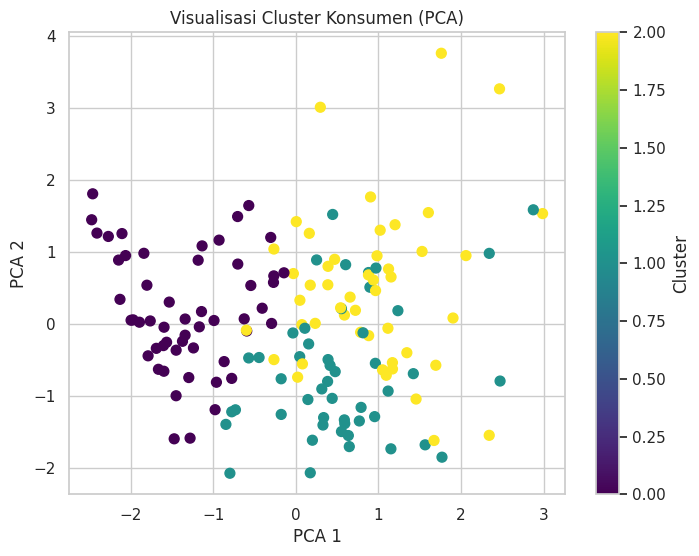

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['amspent'].plot(kind='hist', bins=20, title='amspent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['meat'].plot(kind='hist', bins=20, title='meat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['fish'].plot(kind='hist', bins=20, title='fish')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Supermarket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ID', y='amspent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='amspent', y='meat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='meat', y='fish', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='fish', y='vegetable', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['amspent']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Supermarket')):
  _plot_series(series, series_name, i)
  fig.legend(title='Supermarket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('amspent')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['meat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Supermarket')):
  _plot_series(series, series_name, i)
  fig.legend(title='Supermarket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('meat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['fish']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Supermarket')):
  _plot_series(series, series_name, i)
  fig.legend(title='Supermarket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('fish')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['vegetable']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Supermarket')):
  _plot_series(series, series_name, i)
  fig.legend(title='Supermarket', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('vegetable')

from matplotlib import pyplot as plt
_df_13['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['amspent'].plot(kind='line', figsize=(8, 4), title='amspent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['meat'].plot(kind='line', figsize=(8, 4), title='meat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['fish'].plot(kind='line', figsize=(8, 4), title='fish')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Supermarket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='ID', y='Supermarket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Supermarket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='amspent', y='Supermarket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Supermarket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='meat', y='Supermarket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Supermarket'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='fish', y='Supermarket', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Ambil variabel kuantitatif
features = data[['meat', 'fish', 'vegetable', 'ownbrand', 'tv', 'Radio']]
scaled = StandardScaler().fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled)
data['cluster'] = kmeans.labels_

# Tampilkan hasil
print("Jumlah anggota setiap cluster:")
print(data['cluster'].value_counts())

# Tampilkan isi setiap cluster
for i in range(3):
    print(f"\nContoh data di Cluster {i}:")
    display(data[data['cluster'] == i].head())

# Visualisasi PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:, 0], components[:, 1], c=data['cluster'], cmap='viridis', s=50)
plt.title('Visualisasi Cluster Konsumen (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [18]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled, kmeans.labels_)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.15789615391502246


In [19]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled)
    score = silhouette_score(scaled, kmeans.labels_)
    print(f"Cluster: {k}, Silhouette Score: {score:.4f}")


Cluster: 2, Silhouette Score: 0.1688
Cluster: 3, Silhouette Score: 0.1579
Cluster: 4, Silhouette Score: 0.1713
Cluster: 5, Silhouette Score: 0.1596


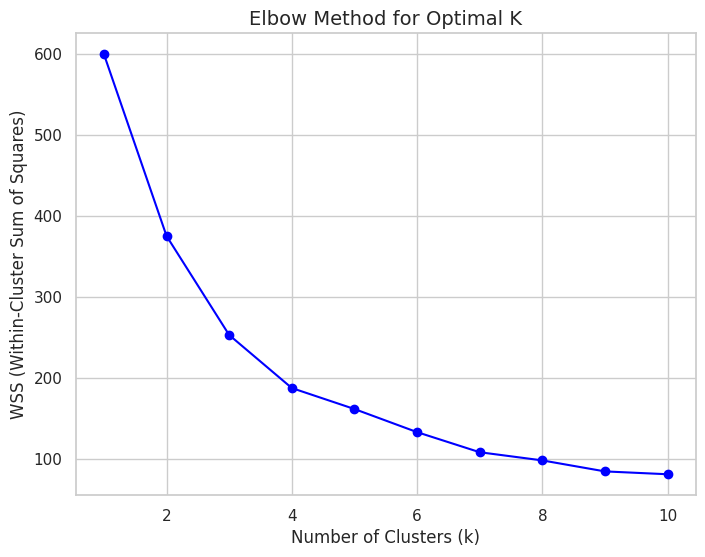

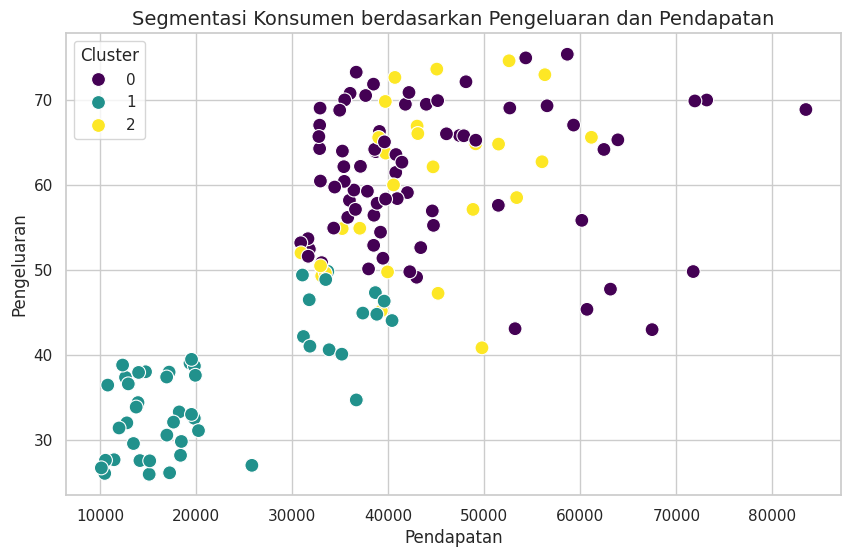

Pusat Klaster:
[[ 0.59339716  0.49500204 -0.47483384  0.31553281]
 [-1.2055427  -1.03999196 -0.35370276 -0.76722018]
 [ 0.49486158  0.47386893  1.94778781  0.48746697]]


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pilih variabel yang relevan untuk clustering
clustering_data = data[['amspent', 'income', 'kids', 'organic']]

# 2. Normalisasi data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# 3. Tentukan jumlah klaster menggunakan Elbow Method
wss = []  # Menyimpan nilai WSS (within-cluster sum of squares)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wss.append(kmeans.inertia_)

# Visualisasikan Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o', color='blue')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.show()

# 4. Berdasarkan grafik Elbow, pilih k optimal, misalnya k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# 5. Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='amspent', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('Segmentasi Konsumen berdasarkan Pengeluaran dan Pendapatan', fontsize=14)
plt.xlabel('Pendapatan', fontsize=12)
plt.ylabel('Pengeluaran', fontsize=12)
plt.legend(title='Cluster')
plt.show()

# Tampilkan pusat klaster
print("Pusat Klaster:")
print(kmeans.cluster_centers_)


<ipython-input-21-41b785f95b9e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='housesize', y='amspent', data=data, palette='Set2')


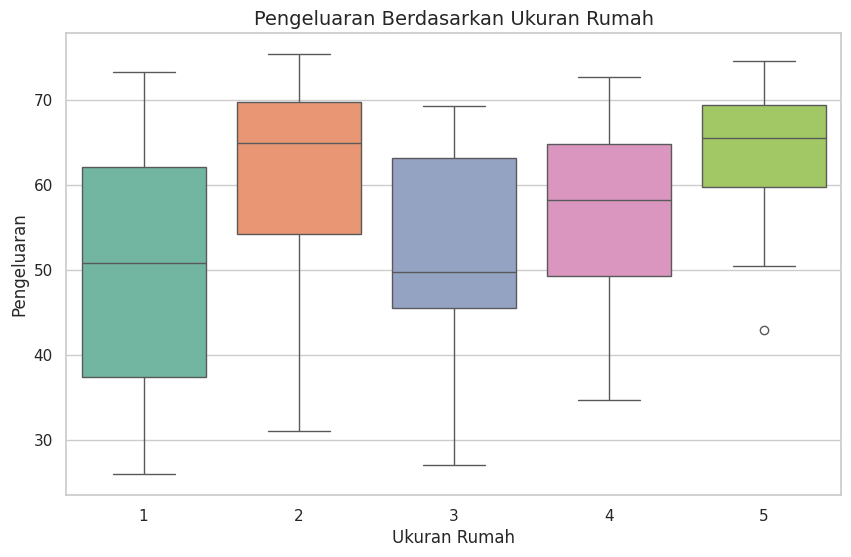

           count       mean        std    min      25%     50%      75%    max
housesize                                                                     
1           89.0  49.600449  14.351625  25.91  37.3600  50.830  62.1300  73.26
2           12.0  60.405000  13.792768  31.05  54.2275  64.945  69.7350  75.37
3           18.0  51.572778  12.401719  26.96  45.4850  49.680  63.1150  69.30
4           16.0  56.982500  10.989214  34.66  49.2625  58.155  64.7975  72.64
5           15.0  63.665333   8.983688  42.94  59.7700  65.560  69.3650  74.60


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualisasi Pengeluaran Berdasarkan Ukuran Rumah
plt.figure(figsize=(10, 6))
sns.boxplot(x='housesize', y='amspent', data=data, palette='Set2')
plt.title('Pengeluaran Berdasarkan Ukuran Rumah', fontsize=14)
plt.xlabel('Ukuran Rumah', fontsize=12)
plt.ylabel('Pengeluaran', fontsize=12)
plt.show()

# 2. Analisis Deskriptif Pengeluaran Berdasarkan Ukuran Rumah
house_size_spending = data.groupby('housesize')['amspent'].describe()
print(house_size_spending)


<ipython-input-22-5767cfbf8827>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='housesize', y='amspent', data=data, palette='Set2')


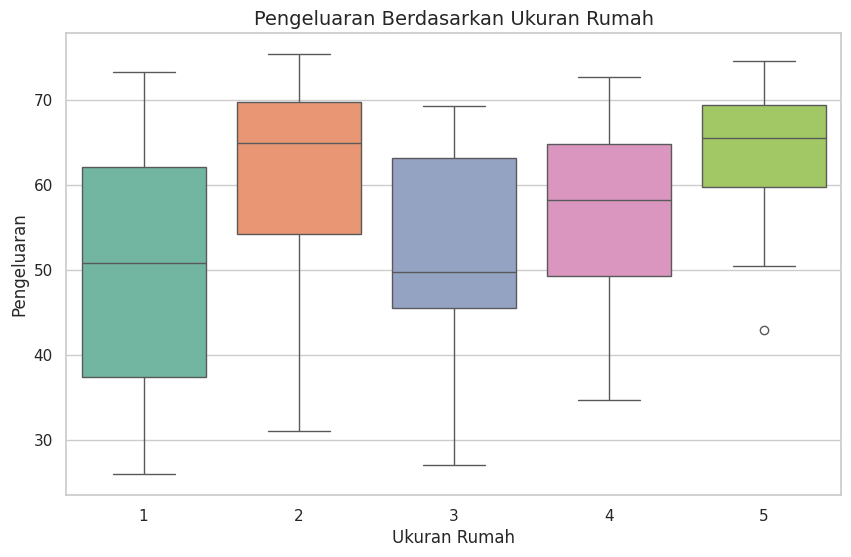

           count       mean        std    min      25%     50%      75%    max
housesize                                                                     
1           89.0  49.600449  14.351625  25.91  37.3600  50.830  62.1300  73.26
2           12.0  60.405000  13.792768  31.05  54.2275  64.945  69.7350  75.37
3           18.0  51.572778  12.401719  26.96  45.4850  49.680  63.1150  69.30
4           16.0  56.982500  10.989214  34.66  49.2625  58.155  64.7975  72.64
5           15.0  63.665333   8.983688  42.94  59.7700  65.560  69.3650  74.60


In [22]:
# 1. Visualisasi Pengeluaran Berdasarkan Ukuran Rumah
plt.figure(figsize=(10, 6))
sns.boxplot(x='housesize', y='amspent', data=data, palette='Set2')
plt.title('Pengeluaran Berdasarkan Ukuran Rumah', fontsize=14)
plt.xlabel('Ukuran Rumah', fontsize=12)
plt.ylabel('Pengeluaran', fontsize=12)
plt.show()

# 2. Analisis Deskriptif Pengeluaran Berdasarkan Ukuran Rumah
house_size_spending = data.groupby('housesize')['amspent'].describe()
print(house_size_spending)


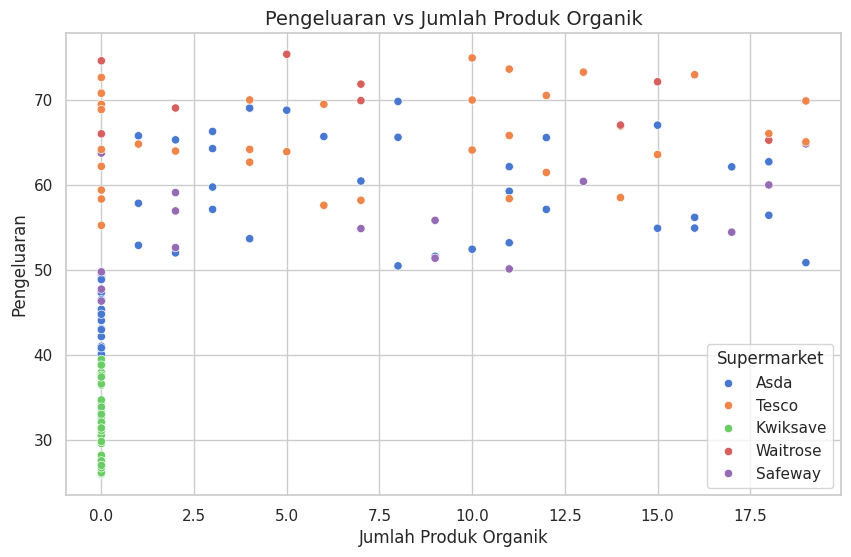

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Visualisasi Pengeluaran vs Jumlah Produk Organik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='organic', y='amspent', data=data, hue='Supermarket', palette='muted')
plt.title('Pengeluaran vs Jumlah Produk Organik', fontsize=14)
plt.xlabel('Jumlah Produk Organik', fontsize=12)
plt.ylabel('Pengeluaran', fontsize=12)
plt.show()


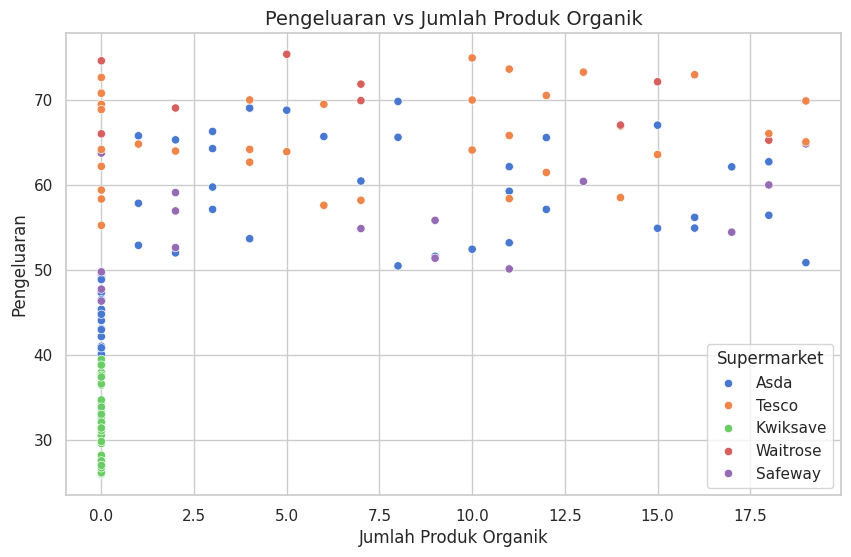

Korelasi Pearson: 0.52
P-value: 0.000


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Visualisasi Pengeluaran vs Jumlah Produk Organik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='organic', y='amspent', data=data, hue='Supermarket', palette='muted')
plt.title('Pengeluaran vs Jumlah Produk Organik', fontsize=14)
plt.xlabel('Jumlah Produk Organik', fontsize=12)
plt.ylabel('Pengeluaran', fontsize=12)
plt.show()

# 2. Pengujian Korelasi Pearson antara Pengeluaran dan Jumlah Produk Organik
correlation, p_value = pearsonr(data['organic'], data['amspent'])
print(f"Korelasi Pearson: {correlation:.2f}")
print(f"P-value: {p_value:.3f}")


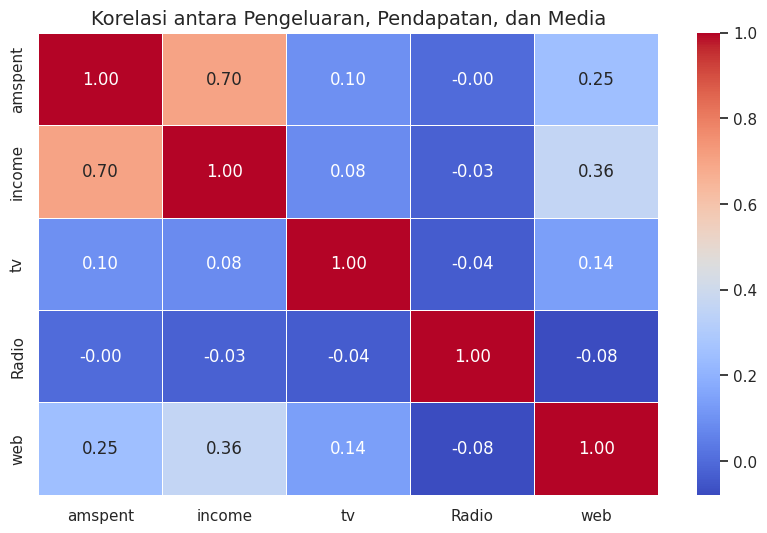

Korelasi Pearson antara Pengeluaran dan Pendapatan: 0.70, P-value: 0.000
Korelasi Pearson antara Pengeluaran dan TV: 0.10, P-value: 0.245
Korelasi Pearson antara Pengeluaran dan Radio: -0.00, P-value: 0.987
Korelasi Pearson antara Pengeluaran dan Web: 0.25, P-value: 0.002


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Korelasi antara Pengeluaran, Pendapatan, TV, Radio, Web
corr_relevant = data[['amspent', 'income', 'tv', 'Radio', 'web']].corr()

# Visualisasikan korelasi antara variabel-variabel tersebut
plt.figure(figsize=(10, 6))
sns.heatmap(corr_relevant, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Pengeluaran, Pendapatan, dan Media', fontsize=14)
plt.show()

# 2. Pengujian Korelasi Pearson antara Pengeluaran dan Pendapatan, serta Penggunaan Media
correlation_amspent_income, p_value_amspent_income = pearsonr(data['amspent'], data['income'])
correlation_amspent_tv, p_value_amspent_tv = pearsonr(data['amspent'], data['tv'])
correlation_amspent_radio, p_value_amspent_radio = pearsonr(data['amspent'], data['Radio'])
correlation_amspent_web, p_value_amspent_web = pearsonr(data['amspent'], data['web'])

# Output Korelasi dan P-value
print(f"Korelasi Pearson antara Pengeluaran dan Pendapatan: {correlation_amspent_income:.2f}, P-value: {p_value_amspent_income:.3f}")
print(f"Korelasi Pearson antara Pengeluaran dan TV: {correlation_amspent_tv:.2f}, P-value: {p_value_amspent_tv:.3f}")
print(f"Korelasi Pearson antara Pengeluaran dan Radio: {correlation_amspent_radio:.2f}, P-value: {p_value_amspent_radio:.3f}")
print(f"Korelasi Pearson antara Pengeluaran dan Web: {correlation_amspent_web:.2f}, P-value: {p_value_amspent_web:.3f}")


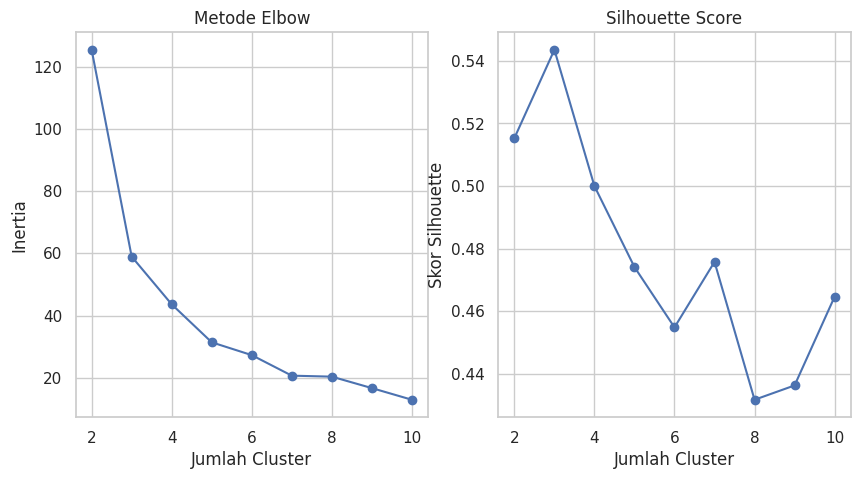

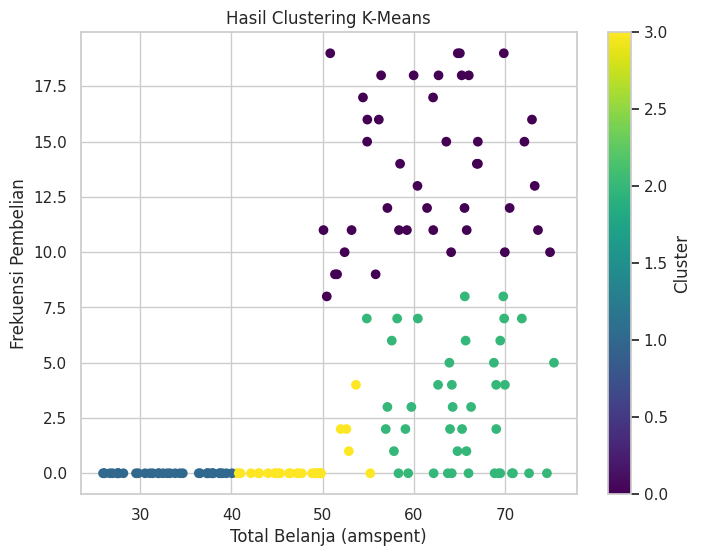

           amspent  Frekuensi_Pembelian Supermarket
Cluster                                            
0        61.734048            13.714286        Asda
1        32.851944             0.000000    Kwiksave
2        65.180476             2.976190       Tesco
3        47.374333             0.300000        Asda


In [29]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# 2. Pembersihan Data
# Menghapus baris dengan nilai yang hilang
data.dropna(inplace=True)

# 3. Memilih Fitur untuk Clustering
# Misalnya, kita akan menggunakan 'amspent' sebagai 'Total_Belanja'
# dan membuat fitur baru 'Frekuensi_Pembelian' (misalnya, dari jumlah transaksi)
# Di sini, kita asumsikan 'organic' merepresentasikan frekuensi pembelian
# (Anda mungkin perlu menyesuaikan ini dengan data Anda)
data['Frekuensi_Pembelian'] = data['organic']
features = data[['amspent', 'Frekuensi_Pembelian']]

# 4. Normalisasi Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 5. Menentukan Jumlah Cluster
# Menggunakan metode elbow untuk menentukan jumlah cluster yang optimal
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Visualisasi Metode Elbow
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

# Visualisasi Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Skor Silhouette')
plt.show()

# 6. Jalankan K-Means dengan Jumlah Cluster Optimal
optimal_k = 4  # Misalnya, setelah analisis, kita memilih 4 cluster
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# 7. Visualisasi Hasil Clustering
plt.figure(figsize=(8, 6))
plt.scatter(data['amspent'], data['Frekuensi_Pembelian'], c=data['Cluster'], cmap='viridis') # Ganti 'Total_Belanja' dengan 'amspent'
plt.title('Hasil Clustering K-Means')
plt.xlabel('Total Belanja (amspent)') # Ganti label x-axis
plt.ylabel('Frekuensi Pembelian')
plt.colorbar(label='Cluster')
plt.show()

# 8. Analisis Hasil Clustering
cluster_summary = data.groupby('Cluster').agg({
    'amspent': 'mean',  # Calculate mean for amspent
    'Frekuensi_Pembelian': 'mean',  # Calculate mean for Frekuensi_Pembelian
    'Supermarket': lambda x: x.mode()[0]  # Get the mode for Supermarket (most frequent value)
    # Add other columns and aggregation functions as needed
})
print(cluster_summary)

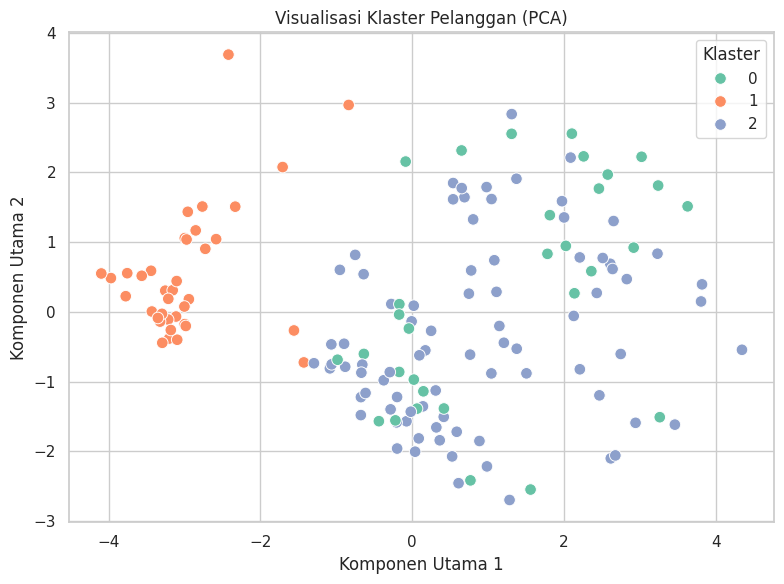

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Misal data sudah dimuat sebagai DataFrame bernama df
features = ['amspent', 'meat', 'fish', 'vegetable', 'ownbrand',
            'organic', 'vegetari', 'car', 'housesize', 'kids',
            'income', 'age']
X = data[features]

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Klasterisasi dengan K-Means (3 klaster)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster'] = clusters

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Buat DataFrame untuk visualisasi
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['cluster'] = clusters

# Visualisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='cluster', palette='Set2', s=70)
plt.title('Visualisasi Klaster Pelanggan (PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Klaster')
plt.tight_layout()
plt.show()


In [33]:
# Rata-rata setiap fitur per klaster
data.groupby('cluster')[features].mean()


,amspent,meat,fish,vegetable,ownbrand,organic,vegetari,car,housesize,kids,income,age
cluster,,,,,,,,,,,,
0,61.226452,9.925484,2.462258,8.481613,22.309677,8.677419,0.838710,0.645161,2.677419,0.709677,43640.064516,48.709677
1,33.335676,2.347297,0.608378,9.178108,1.286486,0.000000,0.216216,0.297297,1.216216,0.081081,17217.567568,21.270270
2,58.571585,7.850244,3.380610,11.922317,28.157317,5.378049,0.024390,0.609756,2.170732,0.292683,42957.743902,48.268293
